In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("DataFrame Shape: ",df.shape)
print("\n Information about datafram: \n")
print(df.info())
print("Describe: \n", df.describe())
print("Nan values in columns:")
print(df.isna().sum())
df.nunique()


DataFrame Shape:  (891, 12)

 Information about datafram: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Describe: 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

info gathered 

columns = 891, rows = 12,
Age and fare in float,
survived mean = 0.38, Pclass mean = 2.3 , Age mean = 29, sibSp mean = 0.5, Parch mean = 0.38, Fare maen = 32.2, 
most null values - Age = 177 , Cabin = 687

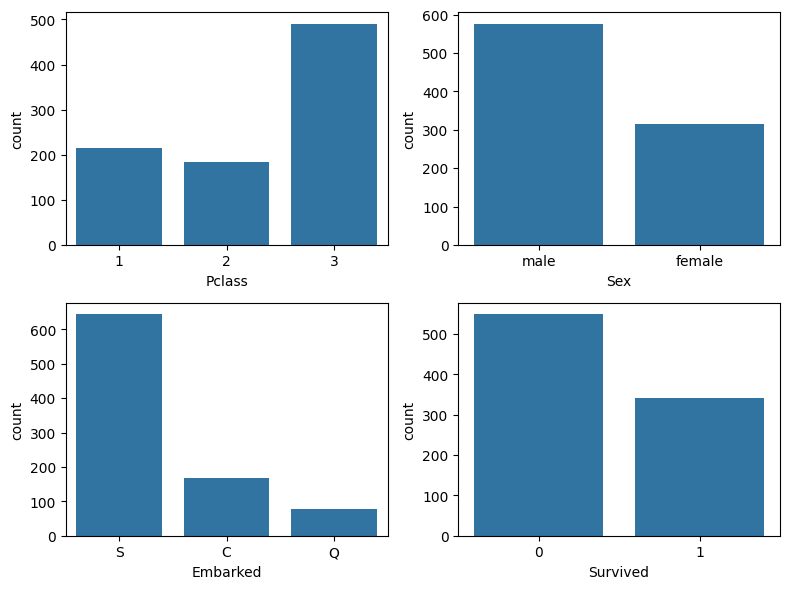

In [4]:
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
sns.countplot(x= df['Pclass'])
plt.subplot(2,2,2)
sns.countplot(x= df['Sex'])
plt.subplot(2,2,3)
sns.countplot(x= df['Embarked'])
plt.subplot(2,2,4)
sns.countplot(x = df['Survived'])

plt.tight_layout()
plt.show()

survival vs different individual feature

<Axes: xlabel='Pclass', ylabel='count'>

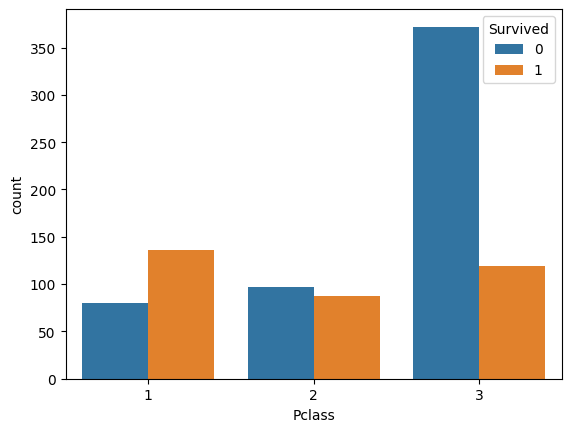

In [5]:
# PClass
# plt.subplot(1,2,1)
sns.countplot(x= df['Pclass'], hue=df['Survived'])
# plt.Subplot(1,2,2)
# surByPclass = df[df['Survived'] === ]

<Axes: xlabel='Sex', ylabel='count'>

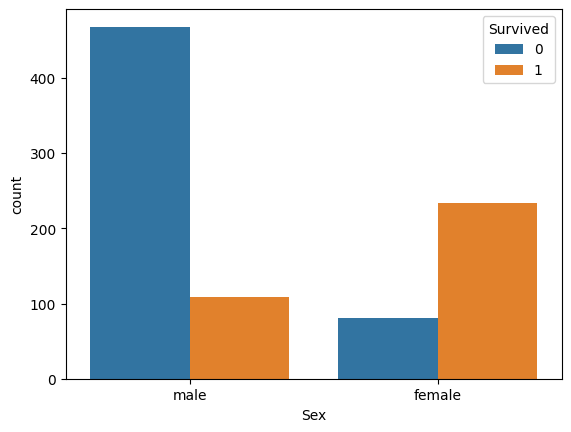

In [6]:
#Sex
sns.countplot(x=df['Sex'], hue=df['Survived'])

In [7]:
# cabin vs survival

<Axes: xlabel='Embarked', ylabel='count'>

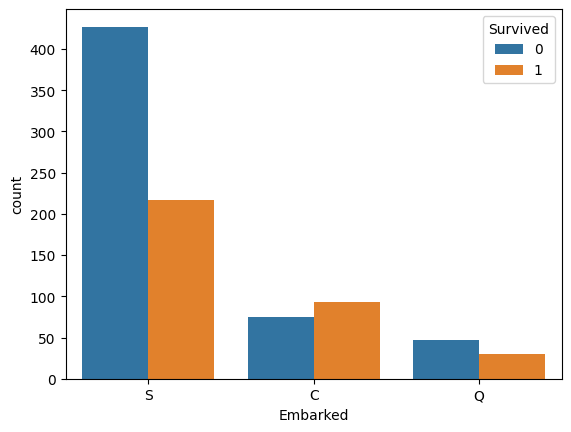

In [8]:
# Embarked

sns.countplot(x=df['Embarked'], hue=df['Survived'])

<Axes: xlabel='Age', ylabel='Count'>

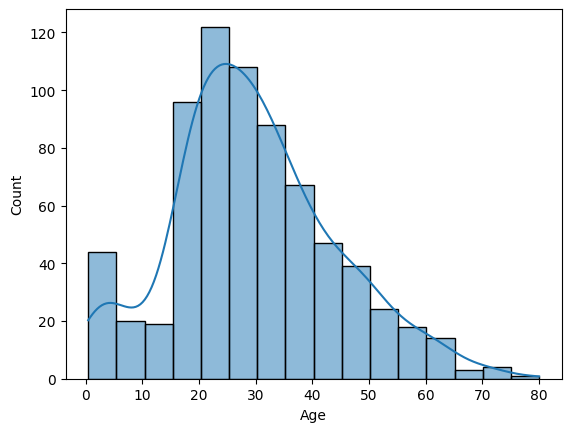

In [9]:
# Distribution of Age
sns.histplot(df['Age'], bins=16, kde=True)

<Axes: xlabel='Survived', ylabel='Age'>

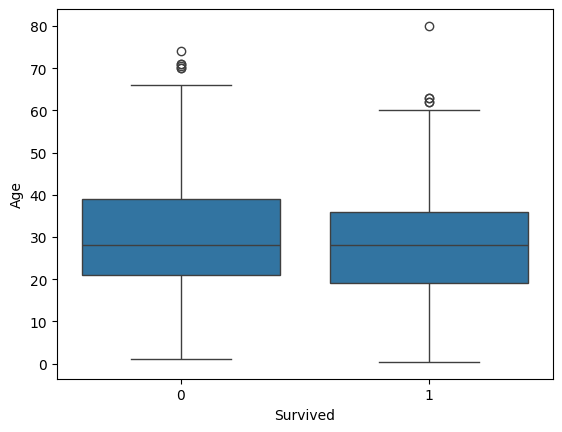

In [ ]:
# plt.figure(figsize=(6, 4))
# sns.violinplot(x='Survived', y='Age', data=df, palette='Set2')
# plt.title('Age Distribution by Survival')
# plt.xlabel('Survived (0 = No, 1 = Yes)')
# plt.ylabel('Age')
# plt.show()
sns.boxplot(x='Survived', y='Age', data=df)


Multivariate plots

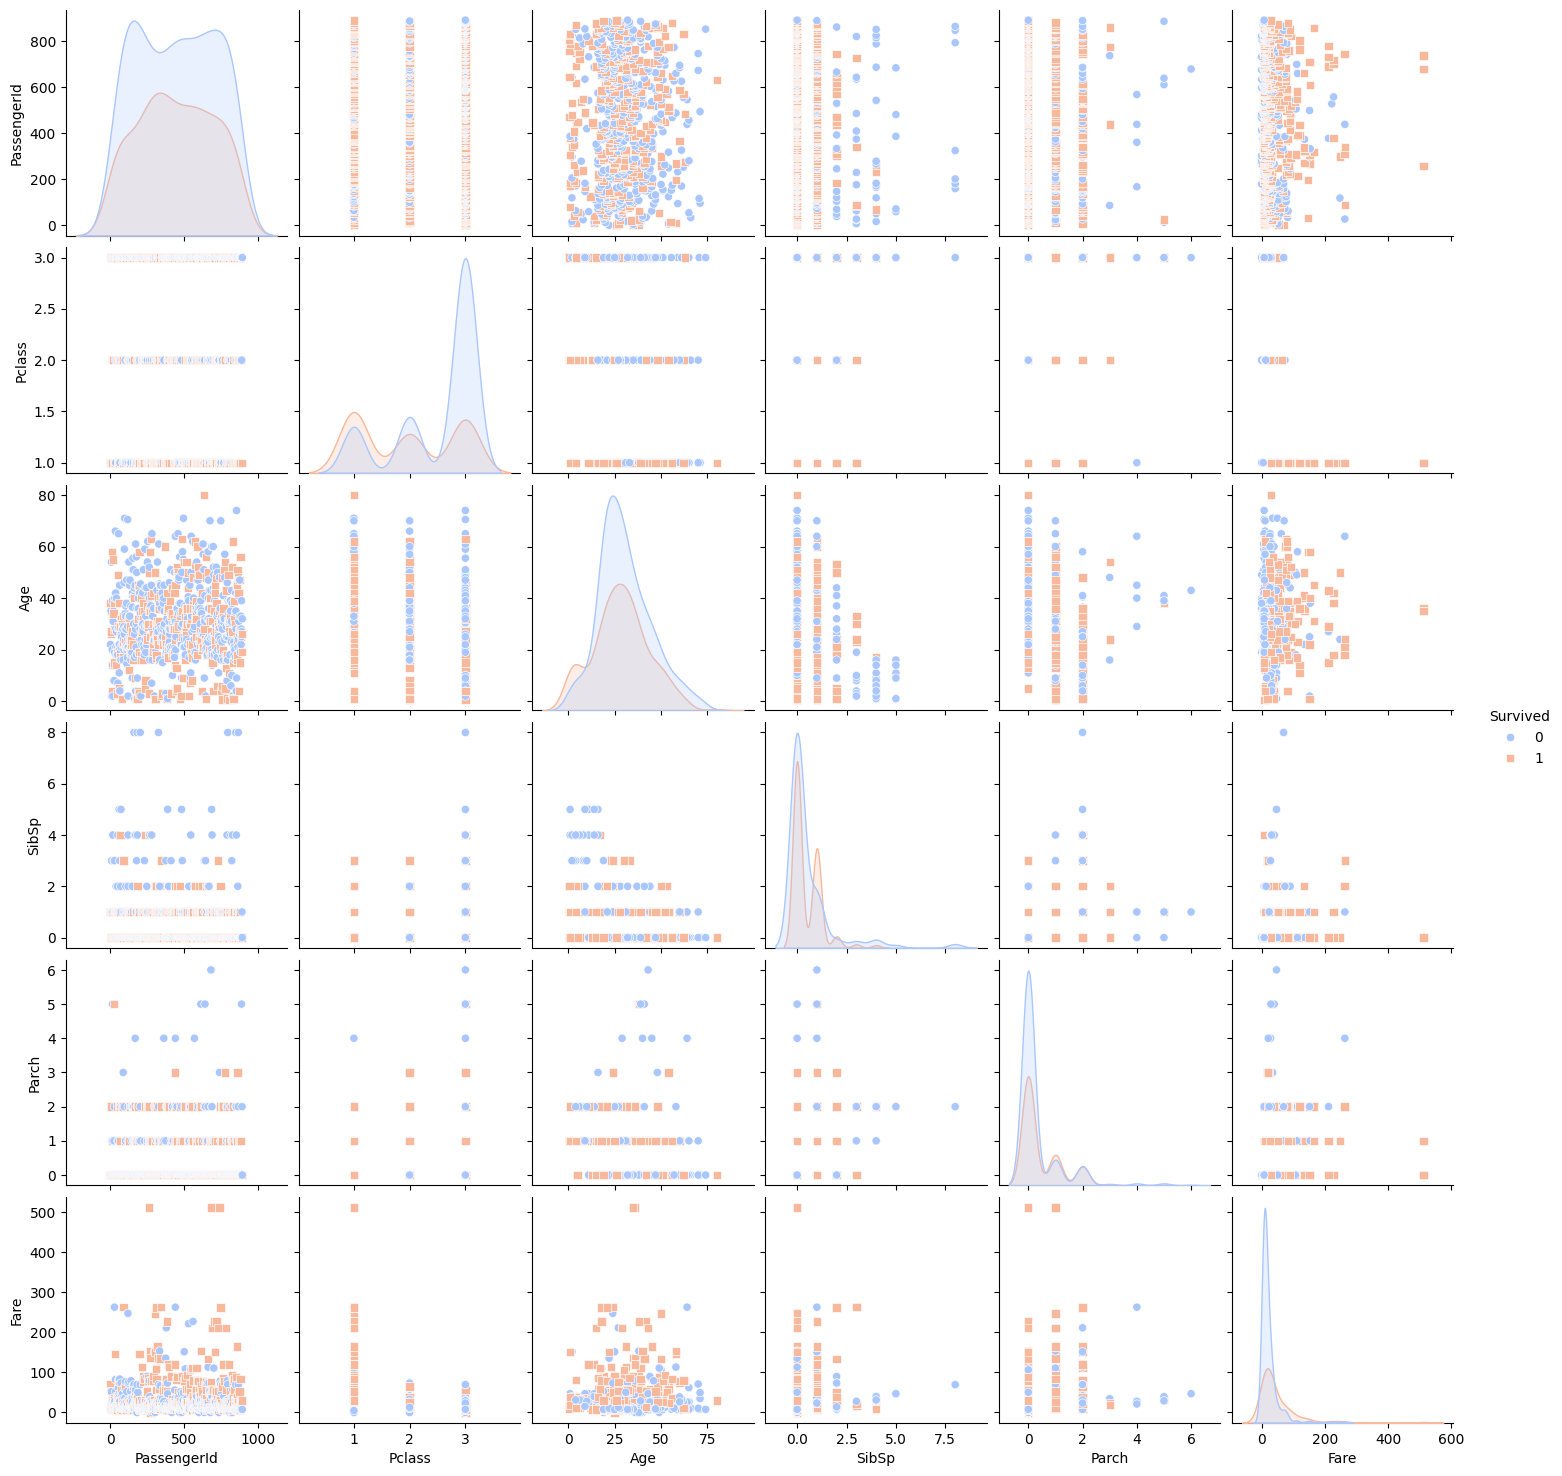

In [11]:
sns.pairplot(df, hue='Survived', palette='coolwarm', markers=["o", "s"])

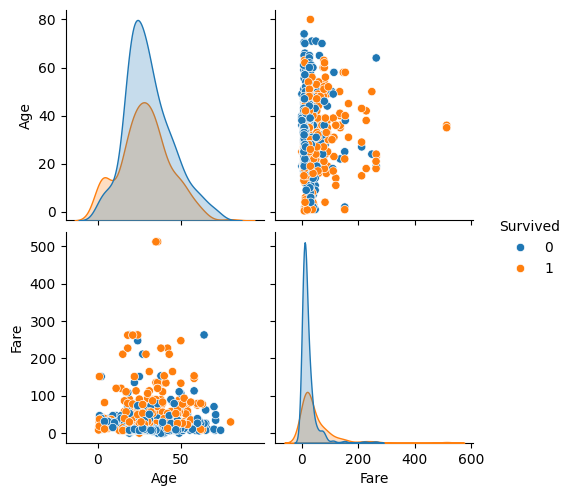

In [13]:
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived')
plt.show()

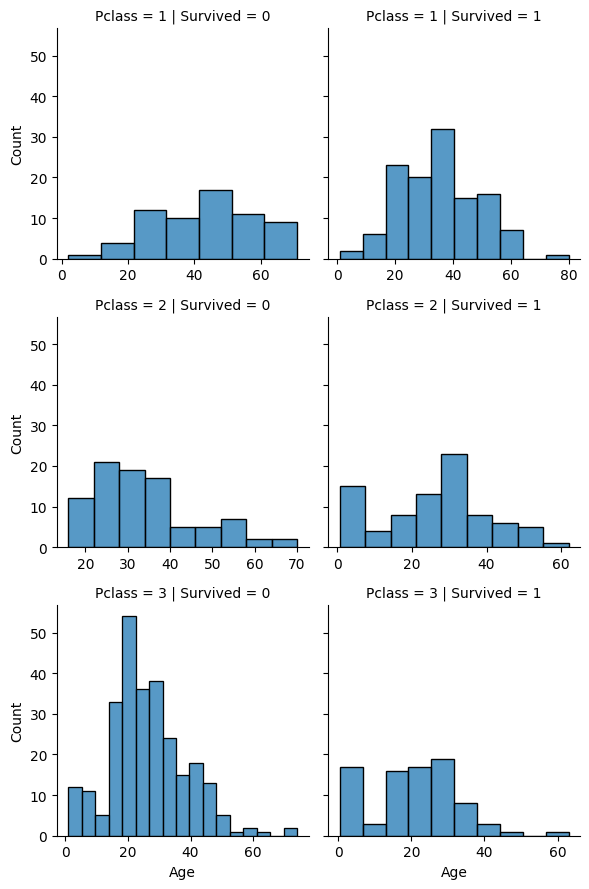

In [19]:
g= sns.FacetGrid(df, col='Survived', row='Pclass', sharex=False)
g.map(sns.histplot, 'Age')


Handle missing values

In [36]:
#Age
median_age=df['Age'].median()
df['Age']=df['Age'].fillna(median_age)
df['Age'].isna().sum()

np.int64(0)

In [42]:
#Embarked
mode_embarked=df['Embarked'].mode()[0]
print(mode_embarked)
df['Embarked']=df['Embarked'].fillna(mode_embarked)
# df['Embarked'].isna().sum()

S


Feature Engineering

In [44]:
# Family Size column
df['FamilySize']= df['Parch'] + df['SibSp']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


<Axes: xlabel='Survived', ylabel='FamilySize'>

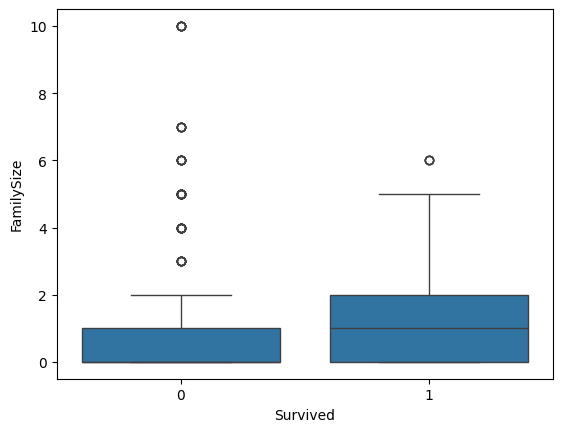

In [48]:
sns.boxplot(x='Survived', y='FamilySize', data=df)

<Axes: xlabel='Survived', ylabel='FamilySize'>

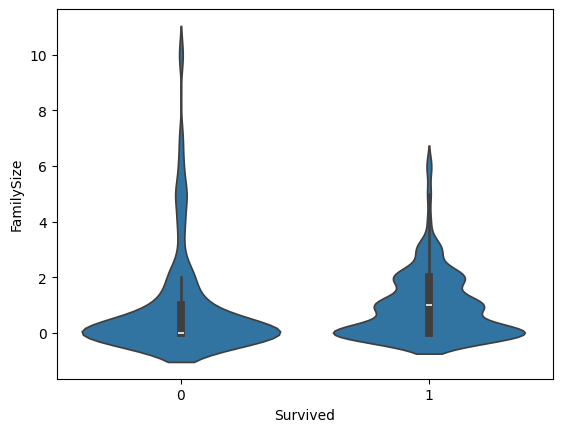

In [49]:
sns.violinplot(x='Survived', y='FamilySize', data=df)